Course: Python for Financial Analysis

ARIMA and ARMA Notes by Samario Torres...strongly suggest to download and open in a Jupyter Notebook

***Note: A lot of this stuff assumes that the y-value is directly connected to the time and that the time is a really important aspect to the y-value. Now, while that is true for a lot of financial data, that doesn't really take into account things like forces outside of the market, such as external traders being able to also buy and sell stock and effect its price. And because of that, you'll hear stock and securities prices are following some sort of Brownian motion almost like a random walk. So they go up and down all the time; for example when you zoom in really close it almost looks random which is why we will also cover Monte Carlo simulations. Because of those aspects of financial data and securities data, this sort of ARIMA forecasting method doesn't really work with stock data in general. Which is inconvenient because it performs really well with this sort of data i.e, where your time has a clear relationship with your y-value, but for stock market data it doesn't really work that way. So that's why we cant really use a lot of these techniques with financial data. ***


ARIMA MODELS: AutoRegressive Integrated Moving Averages

ARIMA Models really often do not work well with historical stock and securities data.

However, they're so fundamental to understanding time series analysis that its still worth it 
to learn them. So for other time series analysis topics, such as trying to predict how many sales
a store will do during the winter or the summer, things of that nature...ARIMA Models are fantastic.

ARIMA Models can be very complex. Below are links in addition to these great websites for ARIMA Models 
https://sites.google.com/site/econometricsacademy/econometrics-models/time-series-arima-models
https://people.duke.edu/~rnau/411arim3.htm

AutoRegressive Integrated Moving Averages Models are generalizations of 
AutoRegressive Moving Average (ARMA) Models.

Both models are fitted to time series data either to better understand the data itself or to predict future points in
the series; known as forecasting.

ARIMA Models have two types: Non-seasonal ARIMA and Seasonal ARIMA.

Non-seasonal ARIMA models are for non-seasonal data and seasonal ARIMA Models are for seasonal
data.

Going to start off with Non-seasonal ARIMA Models and afterwards move on to seasonal ARIMA Models.

If you can understand seasonal ARIMA, then you'll understand non-seasonal ARIMA.

ARIMA models are applied in some cases where data shows evidence of non-stationarity, where an initial differencing
step (corresponding to the "integrated part of the model) can be applied one or more times to eliminate the
non-stationarity. 

Differencing to be discussed soon.

Non-seasonal ARIMA Models are generally denoted as ARIMA(p, d, q) where p,d,and q are non-negative integers.

First Parameter, p: AR(p): Has to do with the AutoRegression component in ARIMA.

A regression model that utilizes the dependent relationship between a current observation and observations
over a previous period; i.e, a basic regression task.


Second Parameter, d: I(d): Has to do with the Integrated component in ARIMA.

Differencing of observations (subtracting an observation at the previous time step) in order to make the time
series stationary.

Third Parameter, q: MA(q): Has to do with the Moving Average component in ARIMA.

A model that uses the dependency between an observation and a residual error from a moving average model applied to
lagged observations.

Stationary vs. Non-Stationary Data:

To effectively use ARIMA, we need to understand Stationarity in our data.

What makes a dataset stationary? Answer: A Stationary time series has constant mean and variance over time.

A stationary dataset will allow our model to predict that the mean and variance will be the same in future periods.

On average, the mean value needs to be constant: Stationary

On average, the mean value increases over time: Non Stationary

In addition, variance should not be a function of time.

Variance tends to stay the same over time: Stationary

Variance changes over time: Non-Stationary

Covariance should also not be a function of time: Recall: Covariance: Visually how fast that variance is changing
along time. (Slow change in variance, then a quick change in variance, etc.)

There is a mathematical test to see if the data has stationarity.

Which is the Augmented Dickey-Fuller Test.

If you determine that your data is not stationary(either visually or mathematically(Dickey-Fuller) ) then you will need to TRANSFORM it to be stationary in order to evaluate it and see what type of ARIMA terms you will be using.

A simple way to do this is differencing.

Differencing: Used to TRANSFORM. Intuition below:

lets say time_1 = 10 and time_2 = 12 for some little table called the original data table

then for the next little table which is called "first difference", the time_1 in that table is NA and the time_2
for that table is equal to time_2_original_table = 12 MINUS time_1_original_table = 10......

so time_2 for the "first_difference" table is 12 - 10 = 2...and you keep doing this...

so for the table called "second difference", the first two times that you have , time_1 and time_2, are NA, 

but the time_3 in the "second difference" table is equal 

to time_3_second_difference_table MINUS time_2_second_difference_table

Bascially you take the value at time = t and subtract from it the value at time = t - 1.

** If you take a first difference and your data is not yet stationary, after you either check it visually or mathematically, what you can then do it take the second difference**

*** You can keep on taking differences as you need. But KEEP IN MIND that if you keep taking more and more
differences, you end up sacrificing a row of data for every difference that you take ***

Summary for Differencing: You can keep differencing until you reach stationarity( which you can check visually or mathematically). Each differencing step comes at a cost of losing a row of data. 

Whats so nice about differencing? Well for SEASONAL data, you can also DIFFERENCE by a SEASON!

For example, if you had monthly data with yearly seasonality; that is, every single row of data you have represented one month of data, you could difference by a time of 12 instead of just one; using pd.shift(12) instead of pd.shift(1)

Another common technique with seasonal ARIMA models is to combine both methods, taking the seasonal difference of 
the first difference. 


So now with the data in a stationary time series, we can discuss the p,d, and q terms and how they get chosen.

But first a review:

Step 1: So you take your data,
Step 2: you check that its stationary using the differencing techniques, and 
Step 3: then you choose p,d, and q values to actually apply the AutoRegressive, Integrated, and Moving Average portion

A big part in choosing those values has to do with AutoCorrelation plots and Partial AutoCorrelation plots.

AutoCorrelation: shows the correlation of the time series with itself, lagged by 'x' amounts of time units.

So the y-axis on this two-dimensional plot shows the correlation value and the x-axis is the number of time units of lag.

So imagine taking your time series of length T and then copying it. 

After you copy it, you delete the first observation of the first copy.

And then you delete the last observation of the second copy. 

So now you have two time series,T_1 and T_2 of length T-1 for which you calculate a correlation coefficient. 

Corr(T_1,T_2) = Correlation Coefficient of T_1 and T_2 = Cov(T_1,T_2) / [std.dev(T_1)*std.dev(T_2)]

This Corr(T_1,T_2) is the value of the vertical axis at x = 1 in the plot.

It represents the correlation of the series lagged by one time unit.

You keep on doing this for all possible time lags, 'x'. And then thats the plot.

There's typically two types of AutoCorrelation plots:

(1) Gradual Decline: Slowly and gradually declining towards zero.


(2) Sharp Drop-off: A large value at first, then hovers around zero, then zeroes out.

Our main priorty here is to try to figure out whether we will use the AR or MA components 
for the ARIMA model (or perhaps even both), as well as how many lags we should use. 

In general, you would use either AR or MA; using both is less common.

When you are actually applying the AR and MA terms, you will set values for p and for q.

If the autocorrelation plot shows POSITIVE autocorrelation at the first lag (lag @ t = 1), then it suggests to use 
the AR terms IN RELATION to the lag.

If the autocorrelation plot shows NEGATIVE autocorrelation at the first lag (lag @ t = 1), then it suggests to use the moving average MA terms IN RELATION to the lag.

Then this allows to decide what actual values of p, d, and q, to provide the ARIMA model.

p: number of lags observation included in the model

d: the number of times that the raw observations are differenced

q: the size of the moving average window, also called the ORDER OF MOVING AVERAGE

There are also 'partial autocorrelation' plots. 

In general, a partial correlation is a condition correlation.

Its the correlation between two variables under the assumption (conditioned on) that we know and take into account
the values of some other set of variables.

For instance, consider a regression context in which y = response variable and x1, x2, x3 are predictor variables.
The partial correlation between y and x3 is the correlation between the variables determined taking into account how
both y and x3 themselves are related to x1 and x2; that is, their conditional correlation.

Typically a sharp drop after lag "k" suggests an Autoregressive AR-k model should be used.

If there is a gradual decline, it suggests a Moving Average MA model. 

Identification of an AutoRegressive AR model is often best done with the PartialAutoCorrelationFunction.

Identification of a Moving Average model is often best done with the AutoCorrelationFunction rather than the
PartialAutoCorrelationFunction. 

Once you've analyzed your data using ACF and PACF, you are ready to begin to apply ARIMA of Seasonal ARIMA
depending on your original data.

An ARIMA model will then take in three terms, p, d, and q.

For seasonal ARIMA there will be an additional set of p, d, and q terms that we will see.

For more information on determind these values p, d, and q, visit https://people.duke.edu/~rnau/arimrule.htm



# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model
* Use the model to make predictions

Let's go through these steps!

## Step 1: Get the Data (and format it)

We will be using some data about monthly milk production, full details on it can be found [here](https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line).

Its saved as a csv for you already, let's load it up:

In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
# df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [47]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [48]:
df.tail() #pulling it up

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


** Clean Up**

Let's clean this up just a little!

In [49]:
df.columns = ['Month','Milk in pounds per cow'] 

# We just renamed the columns as shown above, corresponding_index = 'NameYouWant'

df.head() 

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [50]:
df.drop(168,axis=0,inplace=True)

In [51]:
df['Month'] = pd.to_datetime(df['Month']) #lets convert the monthly column to a datetime column

In [52]:
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [53]:
df.set_index('Month',inplace=True) # setting the index to be the month column
#if we wanted to confirm that, we could say
df.index # and as you see its a datetime index, where the DatetimeIndex refers to the object type

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [55]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [57]:
df.describe().transpose() #nice little row we just transposed a COLUMN

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


## Step 2: Visualize the Data

Let's visualize this data with a few methods.

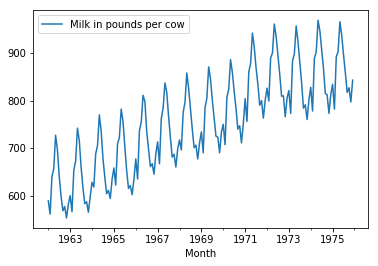

In [59]:
df.plot()
# You should immediately start seeing that this is seasonal data, clearly
# there's some sort of seasonal behavior and seems to have a trend upwards as well
# So you should think to yourself, how can I confirm that there is a seasonality aspect as well as a 
# trending aspect? ETS_Decomposition!!!

In [61]:
timeseries = df['Milk in pounds per cow'] #let timeseries be equal to this column
#if we check the type(timeseries) we will see that its a series, not a dataframe.
type(timeseries)

pandas.core.series.Series

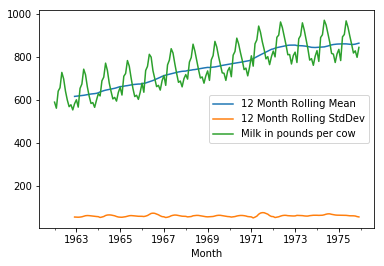

In [65]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean') #grab the time series and call rolling on it
# and then plot it
timeseries.rolling(12).std().plot(label='12 Month Rolling StdDev') 
timeseries.plot()
plt.legend() #to see the actual names of the plot
#usually the scale of standard deviation is much lower than the actual values and that pretty much makes 
# sense for most time series datasets; we're dealing with something thats pretty workable.

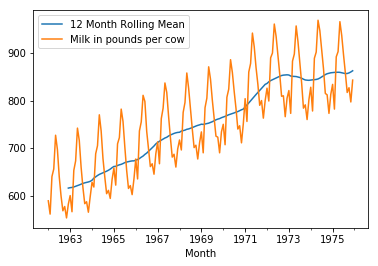

In [66]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean') 
timeseries.plot()
plt.legend()
#this is the graph if we do not plot the standard deviation

## Decomposition

ETS decomposition allows us to see the individual parts!

<Figure size 432x288 with 0 Axes>

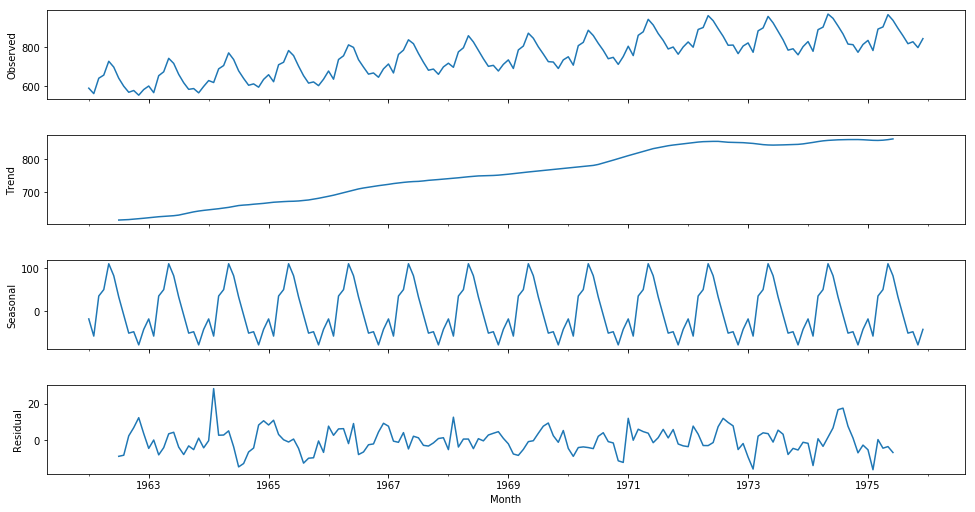

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12) 
# we passed in the time series which is the 'milks in pounds' column from the dataframe
#In the decomposition line, we could have specified another argument
#We chose an additive model by default (by default because thats what it does if you dont specify)
# Because it looks like some sort of linear growth
# Frequency argument is the frequency of the series, it has to be used if 'x' is not a pandas object
# So if we wanted to make sure that every period was a yearly period we would say freq = 12 like we did above.


fig = plt.figure()  
fig = decomposition.plot() #using this so that we only get one graph
fig.set_size_inches(15, 8) #  editing the size
# Rememeber the decomposition plot; what it does is it mathematically separates out the trend component, the seasonal 
# component and the residual component. Remember residual component is the error thats not explained by the 
# seasonality or trend...and then plots them up
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq = 12)
# fig = plt.figure()
# fig = decomposition.plot()


## Testing for Stationarity

We can use the Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

***Statistical Test ***

***Augmented Dickey-Fuller Test (ADF): Mathematically shows if data is stationary or non-stationary ***

***Null Hypothesis: We assume that it has a unit root and therefore is a non-stationary time series ***

***Alternative Hypothesis: The time series has no unit root and is actually a stationary time-series ***

Basically, we are trying to determine whether to accept(also known as 'fail to reject') the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return. The p-value!!!

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [69]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [70]:
from statsmodels.tsa.stattools import adfuller
#from the statsmodels.tsa.stattools library, import adfuller for the Augmented Dickey Fuller
#this little function has everything we need.

In [72]:
result = adfuller(df['Milk in pounds per cow']) #we just call adfuller on the actual time series
#just leaving the other parameters default
#if you click shift+tab right in between the r and parenthesis, you'll see that it returns
# the test statistic some other stuff AND the the ------->p-value(our main concern)<--------

In [76]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221294
p-value : 0.6274267086030316
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [75]:
# Store in a function for later use!
# We're going to functionize the way that we check out the result.
# Because if you look at the result right now, its just a tuple thats not really nicely formatted
# So we are going to create a function that nicely formats this
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series) # this will help us do a repeated adf check in case we need to do it later on
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'] #the labels are going to 
    #correspond to what the result actually has in its order; the tuple

    for value,label in zip(result,labels): #zipping together the result tuple with the labels list
        print(label+' : '+str(value) ) #printing the label plus some space plus the string of the value, so if its
        # a number, we'll turn it into a string so it prints out nicely
    
    if result[1] <= 0.05: # if the p-value is less than 0.05, remember p-value is in the second spot so index 1 
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

___________

## Important Note!

** We have now realized that our data is seasonal (it is also pretty obvious from the plot itself). This means we need to use Seasonal ARIMA on our model. If our data was not seasonal, it means we could use just ARIMA on it. We will take this into account when differencing our data! Typically financial stock data won't be seasonal, but that is kind of the point of this section, to show you common methods, that won't work well on stock finance data!**

_____

## Differencing

The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

** First Difference **

In [88]:
# weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
# data has a unit root, it is non-stationary

#So we need to do DIFFERENCING! We can take the first difference of a time series; which is just the change in one
#time-period to the next; so we can easily calculate this with pandas

#taking the first difference
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1) #subtracting
# everything shifted over one time step

#so it worked out with first difference that the data has no unit root and is stationary
#so we can stop with the differencing
#but lets say that we actually needed to take the second difference 
#here's how
#df['Milk Second Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(1)
#If you plotted this f['Milk Second Difference'] you would see that as you get further in time the variance
#begins to increase

#In general, the milk's nth difference would be 

#df['Milk Nth Difference'] = df['Milk N-1 Difference'] - df['Milk N-1 Difference'].shift(1)

In [91]:
adf_check(df['Milk First Difference'].dropna()) #you need to drop the navalues because you shifted! so we're missing 
#one value at the very beginning
# data is stationary!

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530704
p-value : 0.030068004001785647
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


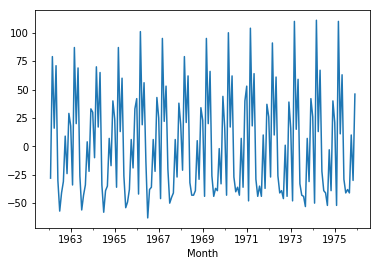

In [92]:
df['Milk First Difference'].plot()

** Second Difference **

In [93]:
# Sometimes it would be necessary to do a second difference 
# This is just for show, we didn't need to do a second difference in our case
df['Milk Second Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(1)

In [94]:
adf_check(df['Milk Second Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.327873645603301
p-value : 1.1126989332084581e-26
#Lags Used : 11
Number of Observations Used : 154
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


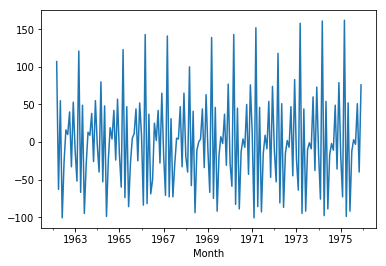

In [95]:
df['Milk Second Difference'].plot()

** Seasonal Difference **

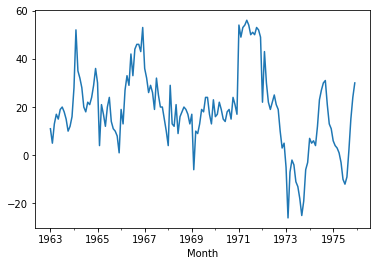

In [98]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12) 
#shifting over by an entire season, that is by 12
df['Seasonal Difference'].plot()

In [101]:
# Seasonal  Difference by itself was not enough!
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.335419314359398
p-value : 0.1607988052771135
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


** Seasonal First Difference **

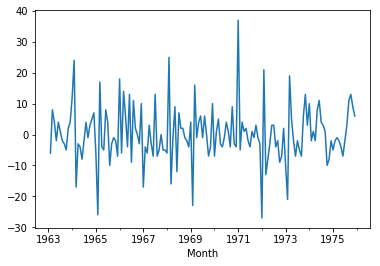

In [103]:
# You can also do seasonal first difference
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
#shifting again by entire season 12
df['Seasonal First Difference'].plot()

In [104]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921984
p-value : 1.8654234318788342e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


# Autocorrelation and Partial Autocorrelation Plots

An autocorrelation plot (also known as a [Correlogram](https://en.wikipedia.org/wiki/Correlogram) ) shows the correlation of the series with itself, lagged by x time units. So the y axis is the correlation and the x axis is the number of time units of lag.

So imagine taking your time series of length T, copying it, and deleting the first observation of copy #1 and the last observation of copy #2. Now you have two series of length T−1 for which you calculate a correlation coefficient. This is the value of of the vertical axis at x=1x=1 in your plots. It represents the correlation of the series lagged by one time unit. You go on and do this for all possible time lags x and this defines the plot.

You will run these plots on your differenced/stationary data. There is a lot of great information for identifying and interpreting ACF and PACF [here](http://people.duke.edu/~rnau/arimrule.htm) and [here](https://people.duke.edu/~rnau/411arim3.htm).

### Autocorrelation Interpretation

The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

* If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

* If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.

_____
### <font color='red'> Important Note! </font> 

Here we will be showing running the ACF and PACF on multiple differenced data sets that have been made stationary in different ways, typically you would just choose a single stationary data set and continue all the way through with that.

The reason we use two here is to show you the two typical types of behaviour you would see when using ACF.
_____

In [105]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

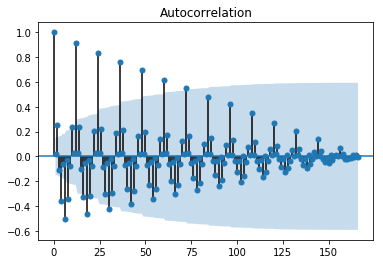

In [109]:
# Duplicate plots
# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265
fig_first = plot_acf(df["Milk First Difference"].dropna())

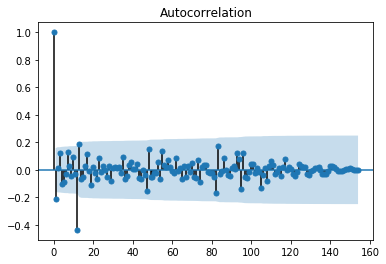

In [115]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna(), use_vlines = True)
#you can get rid of the verical lines below by sepcifying use_vlines = False
# plot_acf(df["Seasonal First Difference"].dropna(), use_vlines = False)

Pandas also has this functionality built in, but only for ACF, not PACF. So I recommend using statsmodels, as ACF and PACF is more core to its functionality than it is to pandas' functionality.

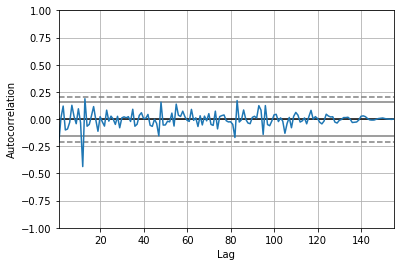

In [111]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

## Partial Autocorrelation

In general, a partial correlation is a conditional correlation.

It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.

For instance, consider a regression context in which y = response variable and x1, x2, and x3 are predictor variables.  The partial correlation between y and x3 is the correlation between the variables determined taking into account how both y and x3 are related to x1 and x2.

Formally, this is relationship is defined as:

## $\frac{\text{Covariance}(y, x_3|x_1, x_2)}{\sqrt{\text{Variance}(y|x_1, x_2)\text{Variance}(x_3| x_1, x_2)}}$

Check out this [link](http://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm) for full details on this.

We can then plot this relationship:

/Users/samariotorres/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


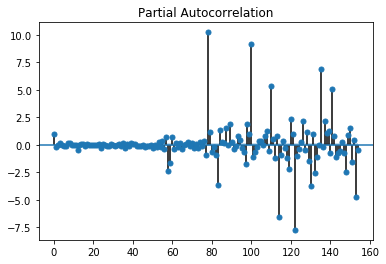

In [117]:
result = plot_pacf(df["Seasonal First Difference"].dropna()) #do this assignment result = so that we only see the 
#grpah one time.


### Interpretation

Typically a sharp drop after lag "k" suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.

_____
### Final ACF and PACF Plots

We've run quite a few plots, so let's just quickly get our "final" ACF and PACF plots. These are the ones we will be referencing in the rest of the notebook below.
_____

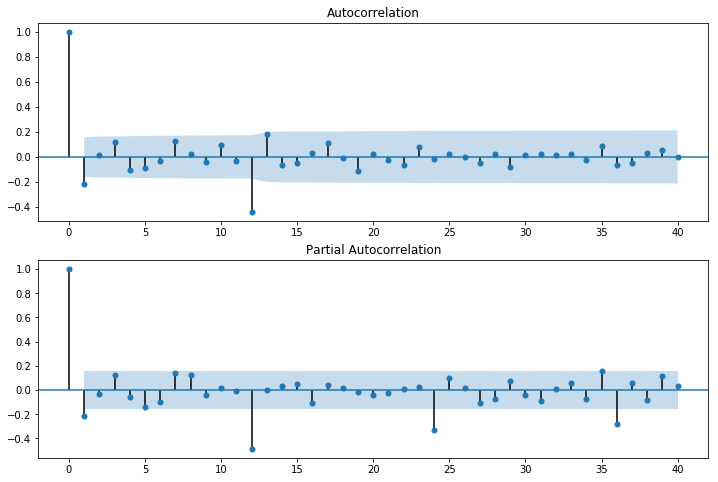

In [120]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

## Using the Seasonal ARIMA model

Finally we can use our ARIMA model now that we have an understanding of our data!

In [122]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [123]:
# I recommend you glance over this!

# 
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


### p,d,q parameters

* p: The number of lag observations included in the model.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

In [126]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit() #need to fit the model 
print(results.summary()) #get back the statespace model results

                                 Statespace Model Results                                 
Dep. Variable:             Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Mon, 07 Jan 2019   AIC                           1074.131
Time:                                    01:46:30   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

/Users/samariotorres/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


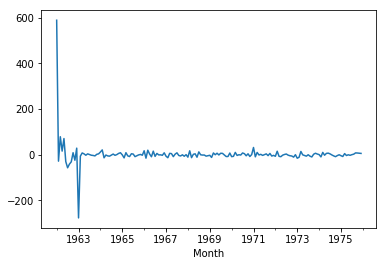

In [128]:
results.resid.plot() #these are the residual error points

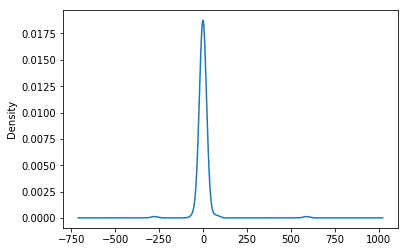

In [131]:
results.resid.plot(kind='kde') #kernel density estimation the closer to zero the better

## Prediction of Future Values

Firts we can get an idea of how well our model performs by just predicting for values that we actually already know:

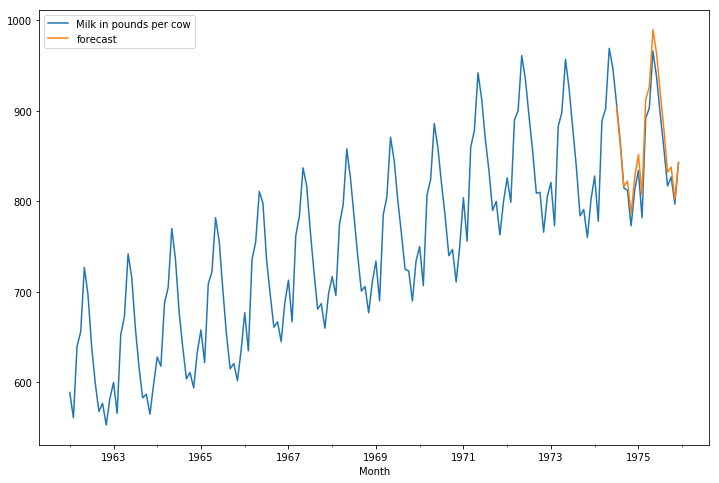

In [132]:
df['forecast'] = results.predict(start = 150, end= 168, dynamic= True)  #start is index point 150, end is 168,
df[['Milk in pounds per cow','forecast']].plot(figsize=(12,8)) #plotting both of these columns

### Forecasting
This requires more time periods, so let's create them with pandas onto our original dataframe!

In [133]:
df.tail() #So we can create more time periods using pandas

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,879.668975
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,832.328555
1975-10-01,827.0,10.0,51.0,15.0,13.0,837.722251
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,802.452737
1975-12-01,843.0,46.0,76.0,30.0,6.0,842.499871


In [135]:
# https://pandas.pydata.org/pandas-docs/stable/timeseries.html
# Alternatives 
# pd.date_range(df.index[-1],periods=12,freq='M')

#So we are going to add on some more months to this dataset with empty values
# and then once the index position are there, we can forecast on them

In [136]:
from pandas.tseries.offsets import DateOffset

In [139]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24) ]
# so its taking the last index value [df.index[-1] which is 1975-12-01, then we're going to add a DateOffset 
# where months is equal to x, so we're going to add an offset of zero months, one month, two months, three months,etc

#but we shouldn't start at 0 months because then we'll have a duplicate so we do for x in range(1,24) instead

In [140]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [141]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
#creating a datafram where the index is equal to the future dates and columns is equal to the orginal columns 

In [145]:
future_df = pd.concat([df,future_dates_df]) #concatenating the orginal data frame with the future data frame

In [146]:
future_df.head()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [151]:
future_df.tail()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525867
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918957
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881182
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027296
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962997


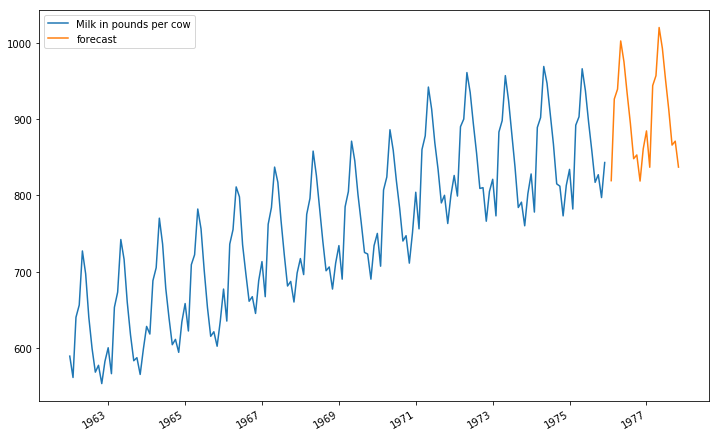

In [150]:
future_df['forecast'] = results.predict(start = 168, end = 192, dynamic= True)  
future_df[['Milk in pounds per cow', 'forecast']].plot(figsize=(12, 8)) 


***Note: A lot of this stuff assumes that the y-value is directly connected to the time and that the time is a really important aspect to the y-value. Now, while that is true for a lot of financial data, that doesn't really take into
account things like forces outside of the market, such as external traders being able to also buy and sell stock and effect its price. And because of that, you'll hear stock and securities prices are following some sort of Brownian 
motion almost like a random walk. So they go up and down all the time; for example when you zoom in really close
it almost looks random which is why we will also cover Monte Carlo simulations. Because of those aspects of financial data and securities data, this sort of ARIMA forecasting method doesn't really work with stock data in general. Which is inconvenient because it performs really well with this sort of data, where you're time has a clear relationship with your y-value, but for stock market data it doesn't really work that way. So that's why we cant really use a lot of these techniques with financial data. ***